In [4]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)


In [5]:
from src.data_cleaning import load_and_clean_data
from src.transaction_encoder import create_basket, one_hot_encode
from src.apriori_analysis import run_apriori
from src.association_rules import generate_rules
from src.visualization import plot_lift_confidence, plot_association_network


In [6]:
data_path = os.path.join(project_root, "data", "Online_Retail.csv")

df = load_and_clean_data(data_path)
basket = create_basket(df)
basket = basket[basket.apply(len) > 1]
encoded_df = one_hot_encode(basket)

frequent_itemsets = run_apriori(encoded_df, min_support=0.02)
rules = generate_rules(frequent_itemsets, metric="lift", min_threshold=1.2)


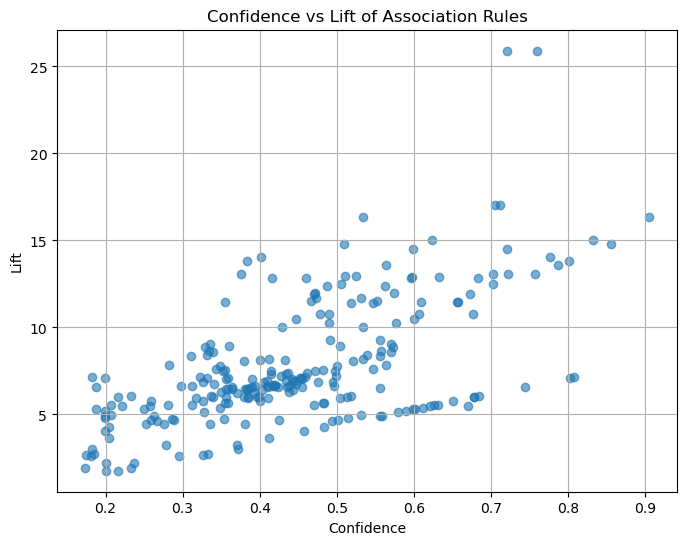

In [7]:
plot_lift_confidence(rules)


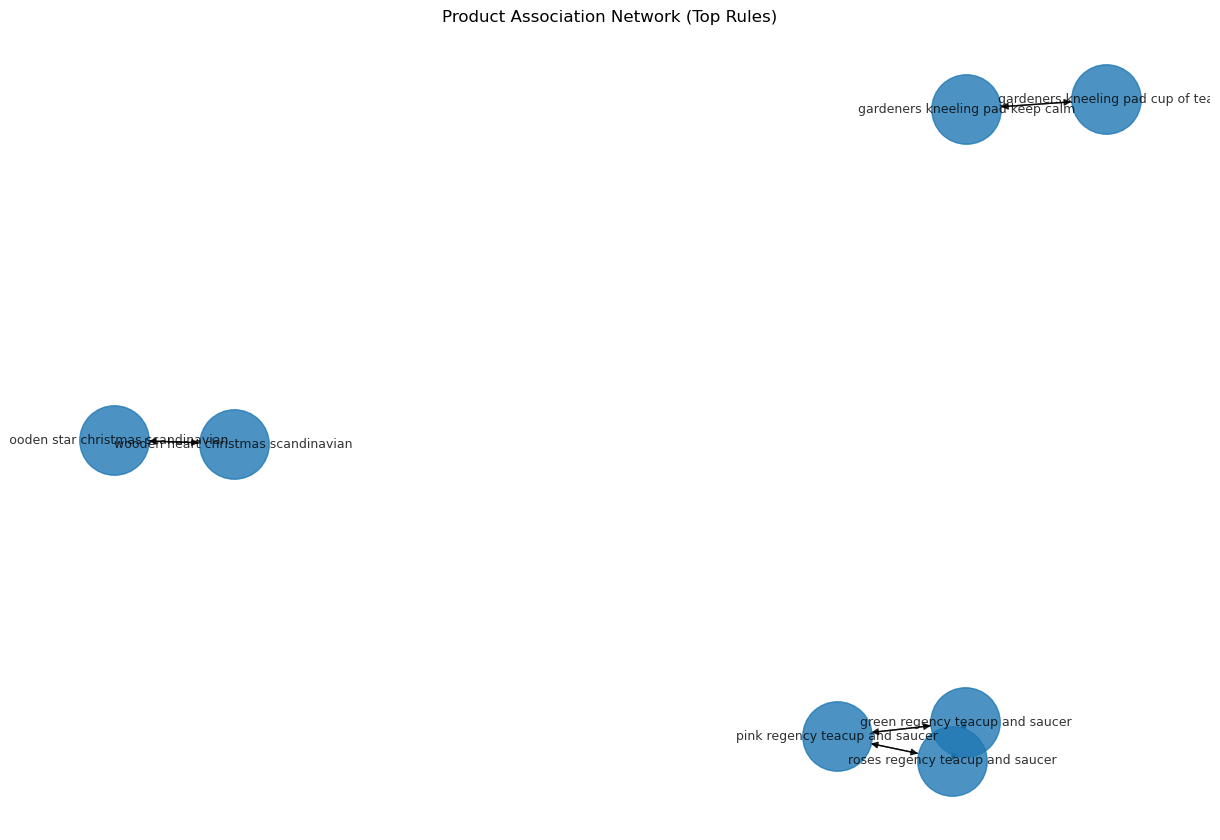

In [8]:
plot_association_network(rules, top_n=12)


### Key Insights

- Products forming dense clusters are frequently purchased together
- High-lift edges indicate strong cross-selling opportunities
- These associations can guide shelf placement and bundle offers
